## ResNet 응용


In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions

In [3]:
resnet50 = ResNet50()
resnet50.summary()

102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
up = files.upload()

Saving cat.jpg to cat.jpg


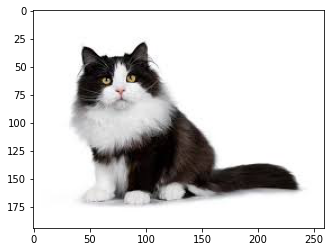

In [7]:
img = Image.open('cat.jpg')
plt.imshow(img);

In [ ]:
# ResNet50은 224*224*3 기준으로 이미지를 처리함

In [8]:
img = img.resize((224,224))

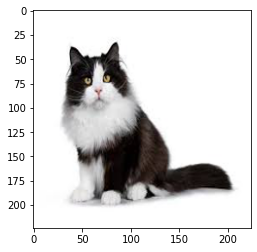

In [10]:
plt.imshow(img)
plt.show()

In [11]:
# 이미지 예측
img_array = np.array(img)
img_array.shape

(224, 224, 3)

In [13]:
yhat = resnet50.predict(img_array.reshape(1,224,224,3))
label = decode_predictions(yhat)
yhat.shape, label

49152/35363 [=========================================] - 0s 0us/step


((1, 1000),
 [[('n02124075', 'Egyptian_cat', 0.21627283),
   ('n02123045', 'tabby', 0.107185),
   ('n02123394', 'Persian_cat', 0.101226985),
   ('n02123597', 'Siamese_cat', 0.079363704),
   ('n03482405', 'hamper', 0.029425321)]])

In [ ]:
yhat[0, 0:]

In [19]:
img_class = label[0][0][1]
img_prob = label[0][0][2]
img_class, img_prob

('Egyptian_cat', 0.21627283)